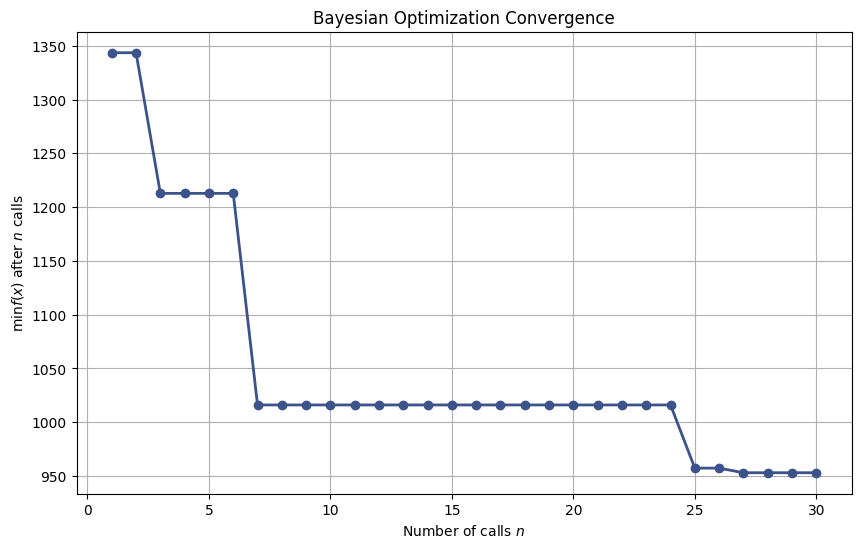

([14, 2], 952.9794742900534)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Create a regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

# Define the objective function for Bayesian optimization
def objective(params):
    max_depth, min_samples_split = params
    model = DecisionTreeRegressor(max_depth=int(max_depth), min_samples_split=int(min_samples_split))
    return -np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error"))

# Define the search space for hyperparameters
space = [(1, 20),  # max_depth
         (2, 20)]  # min_samples_split

# Run Bayesian Optimization
result = gp_minimize(objective, space, n_calls=30, random_state=42)

# Visualize convergence
plt.figure(figsize=(10, 6))
plot_convergence(result)
plt.title("Bayesian Optimization Convergence")
plt.show()

# Visualize the best hyperparameters found
best_hyperparams = result.x
best_score = result.fun

best_hyperparams, best_score
